First we load the necessay modules!

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np 
import statsmodels.api as sm  
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pylab as plt 
import matplotlib.dates as dates
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

We create the data frame using the pandas module and name it data!
Now let's print out the first 12 values!

In [14]:
dataMaster = pd.read_csv('ts.csv')
sp_500 =  dataMaster['sp_500']
print sp_500.head(12)

0     464.547500
1     479.072510
2     493.987503
3     507.725006
4     523.650009
5     538.805008
6     553.680008
7     560.649994
8     573.727493
9     582.029983
10    594.149994
11    612.307495
Name: sp_500, dtype: float64


Next we create a panda series object to make data a time series object!
Which we can check by outputting the ts.dtypes!

In [15]:
ran = pd.date_range('1995-1', '2016-1', freq = 'M')
print ran
ts = pd.Series(dataMaster['sp_500'].values, index = ran)
print ts.head(12)
print ts.dtypes
print ran

<class 'pandas.tseries.index.DatetimeIndex'>
[1995-01-31, ..., 2015-12-31]
Length: 252, Freq: M, Timezone: None
1995-01-31    464.547500
1995-02-28    479.072510
1995-03-31    493.987503
1995-04-30    507.725006
1995-05-31    523.650009
1995-06-30    538.805008
1995-07-31    553.680008
1995-08-31    560.649994
1995-09-30    573.727493
1995-10-31    582.029983
1995-11-30    594.149994
1995-12-31    612.307495
Freq: M, dtype: float64
float64
<class 'pandas.tseries.index.DatetimeIndex'>
[1995-01-31, ..., 2015-12-31]
Length: 252, Freq: M, Timezone: None


Now let's test to see if the objeet will output the data for a specific year! I'm using 2014


In [16]:
print ts['2014']

2014-01-31    1812.434967
2014-02-28    1811.992523
2014-03-31    1862.107483
2014-04-30    1867.387482
2014-05-31    1897.945007
2014-06-30    1942.062500
2014-07-31    1953.755036
2014-08-31    1960.747528
2014-09-30    1989.915009
2014-10-31    1957.084991
2014-11-30    2040.635010
2014-12-31    2047.697510
Freq: M, dtype: float64


Let's create the interval where we take out 2015 to create predict our ARIMA function based off of this interval!


In [17]:
sp500_TR = ts['1995':'2014']
print sp500_TR

1995-01-31    464.547500
1995-02-28    479.072510
1995-03-31    493.987503
1995-04-30    507.725006
1995-05-31    523.650009
1995-06-30    538.805008
1995-07-31    553.680008
1995-08-31    560.649994
1995-09-30    573.727493
1995-10-31    582.029983
1995-11-30    594.149994
1995-12-31    612.307495
1996-01-31    621.354996
1996-02-29    643.597504
1996-03-31    642.632492
...
2013-10-31    1715.160004
2013-11-30    1781.065003
2013-12-31    1818.084991
2014-01-31    1812.434967
2014-02-28    1811.992523
2014-03-31    1862.107483
2014-04-30    1867.387482
2014-05-31    1897.945007
2014-06-30    1942.062500
2014-07-31    1953.755036
2014-08-31    1960.747528
2014-09-30    1989.915009
2014-10-31    1957.084991
2014-11-30    2040.635010
2014-12-31    2047.697510
Freq: M, Length: 240


Now for the time series plot!!


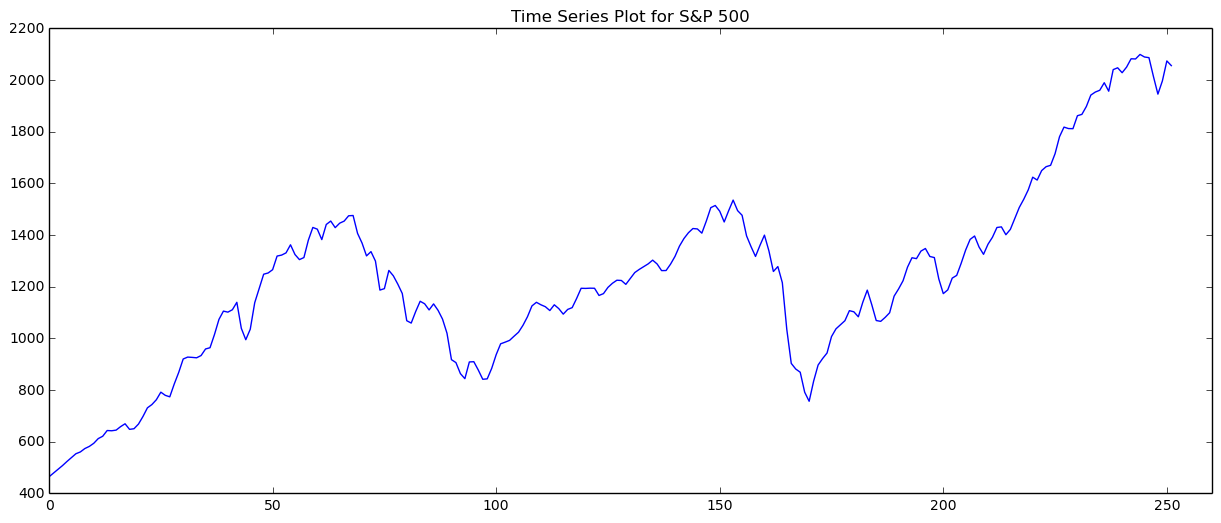

In [25]:
plt.plot(ts)
plt.title('Time Series Plot for S&P 500')
plt.xlim([0, 260])
plt.show()


We can see that there's a lot of trend and the time series jumps around a lot which would lead us to difference it to make it stationary! So I created the differenced time series recall to drop the first value since a NaN is produced and would lead to errors later on!



In [21]:
sp500_diff = ts - ts.shift()
diff = sp500_diff.dropna()
print diff.head(12)

1995-02-28    14.525010
1995-03-31    14.914993
1995-04-30    13.737503
1995-05-31    15.925003
1995-06-30    15.154999
1995-07-31    14.875000
1995-08-31     6.969986
1995-09-30    13.077499
1995-10-31     8.302490
1995-11-30    12.120010
1995-12-31    18.157502
1996-01-31     9.047501
Freq: M, dtype: float64


Next we plot it to see if the time series is stationary

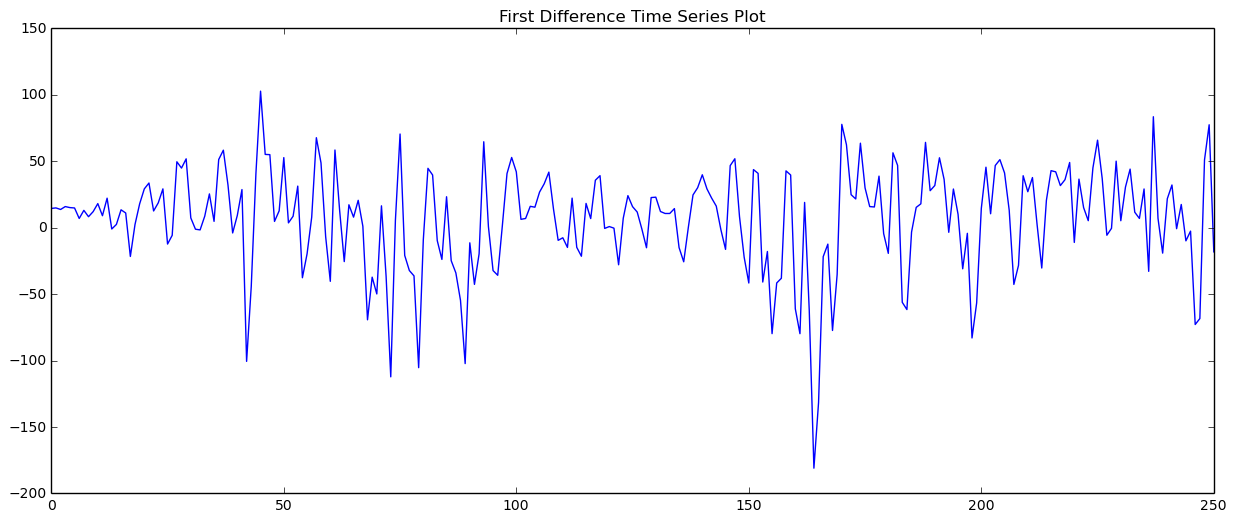

In [22]:
plt.plot(diff)
plt.title('First Difference Time Series Plot')
plt.show()

We deduce its stationary so we check the acf and pacf plots to estimate the model!

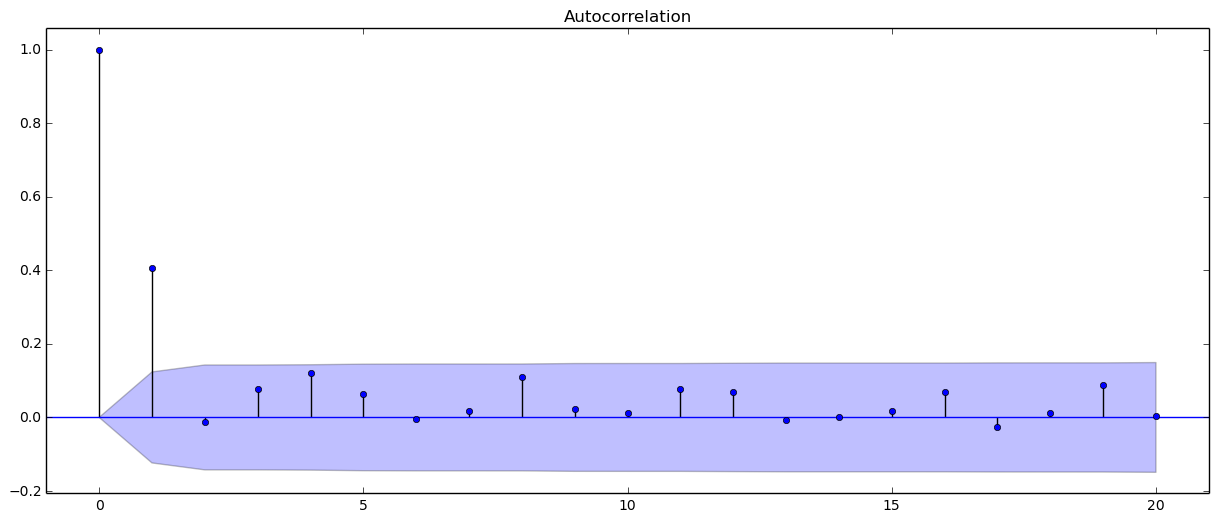

In [27]:
acfDiff = plot_acf(diff, lags = 20)
acfDiff.show()

Next the pacf!

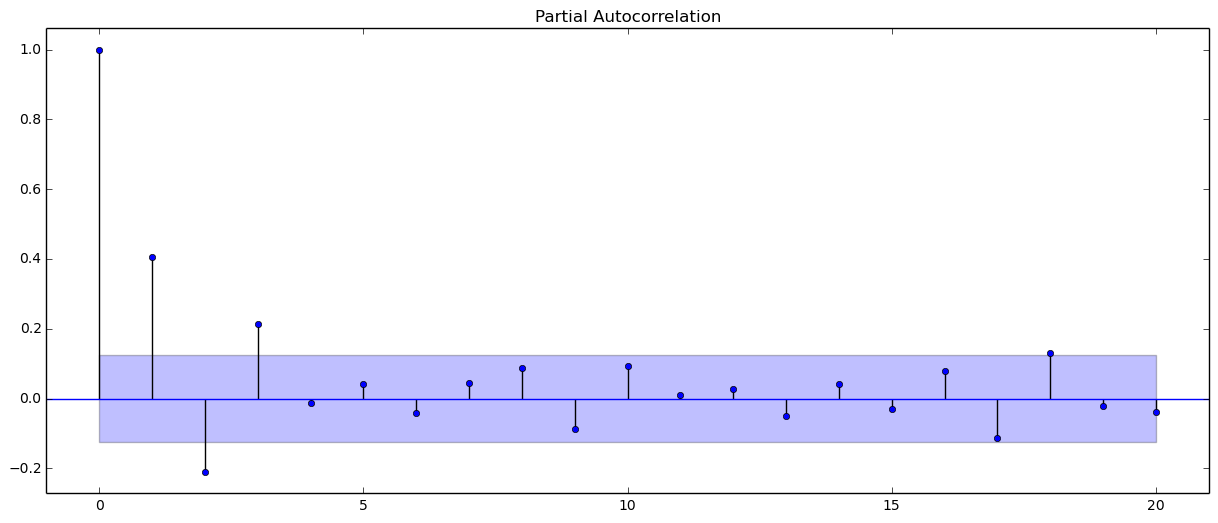

In [28]:
pacfDiff = plot_pacf(diff, lags = 20)
pacfDiff.show()

Therefore we deduce it is an MA(1) but since we took the difference we conclude its an ARIMA(0, 1, 1)! So next we create the model with statsmodels ARIMA function!


In [29]:
mod = ARIMA(sp500_TR, order = (0, 1, 1), freq = 'M')

results = mod.fit()
print results.summary()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  239
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1181.583
Method:                       css-mle   S.D. of innovations             33.924
Date:                Thu, 29 Sep 2016   AIC                           2369.165
Time:                        15:31:17   BIC                           2379.595
Sample:                    02-28-1995   HQIC                          2373.368
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.4929      3.433      1.892      0.060        -0.235    13.221
ma.L1.D.y      0.5666      0.055     10.282      0.000         0.459     0.675
                                    Roots           

Boom here are the summary statistics for the model (not a good one btw...) Next is predicting and comparing them to the actual values for 2015!

In [30]:
# Here's us predicting the year 2015
predVals = results.predict(239, 251, typ='levels')
print predVals

2014-12-31    2107.259397
2015-01-31    2020.444050
2015-02-28    2026.936909
2015-03-31    2033.429767
2015-04-30    2039.922626
2015-05-31    2046.415484
2015-06-30    2052.908343
2015-07-31    2059.401201
2015-08-31    2065.894060
2015-09-30    2072.386918
2015-10-31    2078.879777
2015-11-30    2085.372635
2015-12-31    2091.865494
Freq: M, dtype: float64


DISCLAIMER: Wasn't sure why it predicts Dec 2014, but whenever I try to change the predicting intervals I get errors so I just dropped it, but I will look into fixing this!

In [31]:
predVals = predVals.drop(predVals.index[0])
print predVals

2015-01-31    2020.444050
2015-02-28    2026.936909
2015-03-31    2033.429767
2015-04-30    2039.922626
2015-05-31    2046.415484
2015-06-30    2052.908343
2015-07-31    2059.401201
2015-08-31    2065.894060
2015-09-30    2072.386918
2015-10-31    2078.879777
2015-11-30    2085.372635
2015-12-31    2091.865494
dtype: float64


Next we concatenate the predicted values with the entire time series to plot the predicted vs the actual values!

In [32]:
concan = pd.concat([ts, predVals], axis = 1, keys=['original', 'predicted'])
print concan['2014':'2015']

               original    predicted
2014-01-31  1812.434967          NaN
2014-02-28  1811.992523          NaN
2014-03-31  1862.107483          NaN
2014-04-30  1867.387482          NaN
2014-05-31  1897.945007          NaN
2014-06-30  1942.062500          NaN
2014-07-31  1953.755036          NaN
2014-08-31  1960.747528          NaN
2014-09-30  1989.915009          NaN
2014-10-31  1957.084991          NaN
2014-11-30  2040.635010          NaN
2014-12-31  2047.697510          NaN
2015-01-31  2028.592499  2020.444050
2015-02-28  2050.415039  2026.936909
2015-03-31  2082.582459  2033.429767
2015-04-30  2081.859925  2039.922626
2015-05-31  2099.354920  2046.415484
2015-06-30  2089.485046  2052.908343
2015-07-31  2086.920044  2059.401201
2015-08-31  2014.084992  2065.894060
2015-09-30  1945.722504  2072.386918
2015-10-31  1996.757538  2078.879777
2015-11-30  2074.259979  2085.372635
2015-12-31  2056.099976  2091.865494

[24 rows x 2 columns]


There you go! Now we plot the figure and see how well our predictions did!!

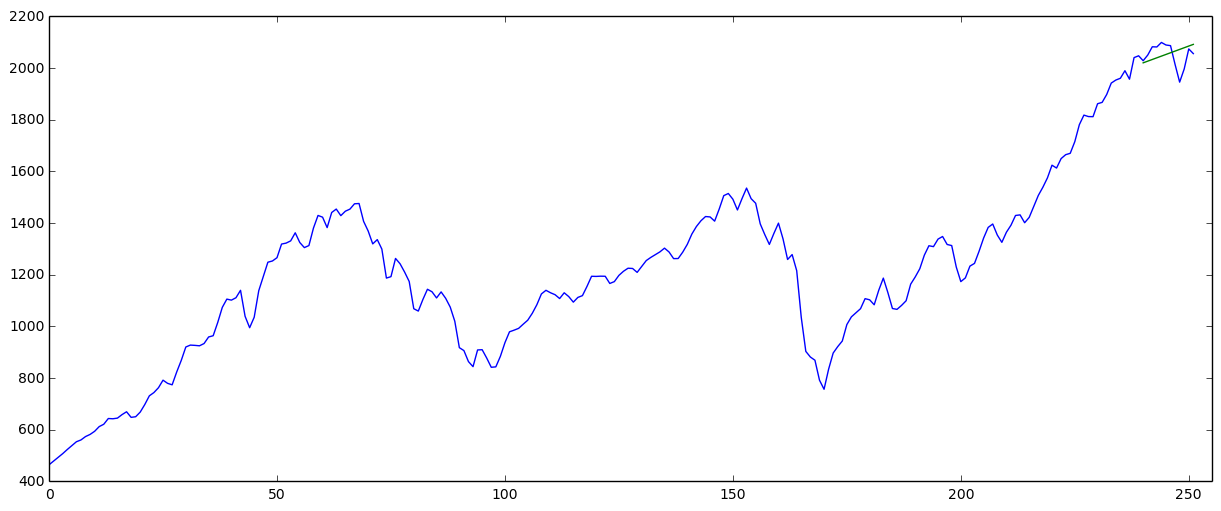

In [45]:
plt.plot(concan)
plt.xlim([0, 255])
plt.show()

Not that good a visual so we zoom in to get a better picture!

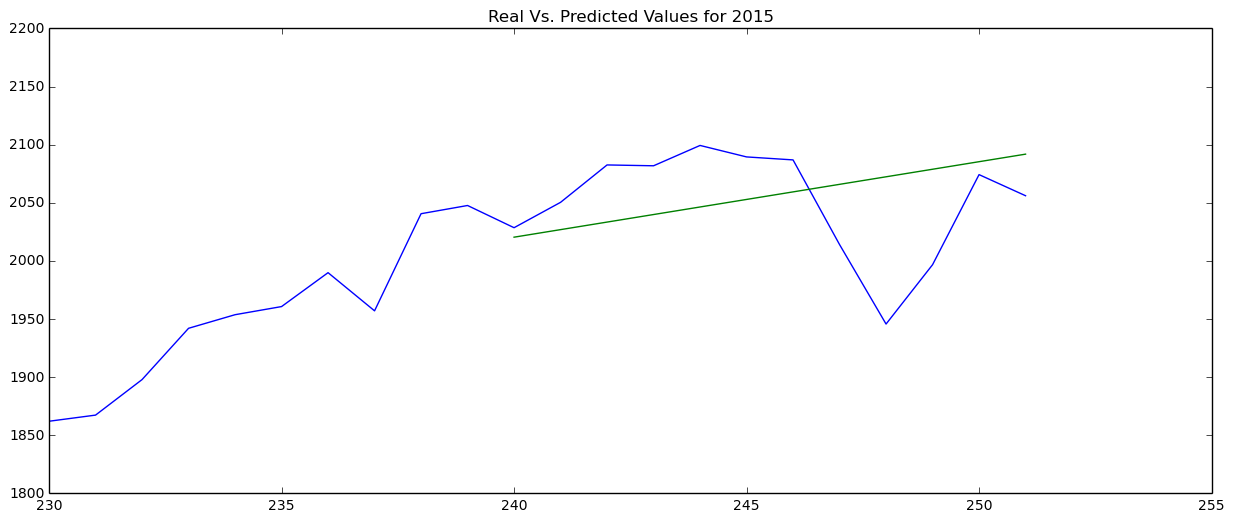

In [43]:
plt.plot(concan)
plt.xlim([230, 255])
plt.ylim([1800, 2200])
plt.title('Real Vs. Predicted Values for 2015')
plt.show()

The prediction is so-so this is one of the first iterations so its not perfect and I'm just practicing creating a notebook because I just discovered how to do so and it's pretty legit 